In [1]:
import gurobipy as gp
from gurobipy import GRB
from gurobipy import quicksum

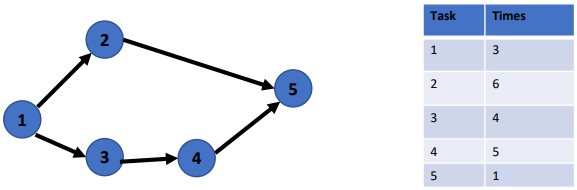

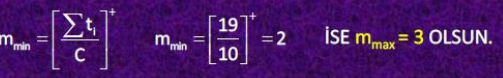

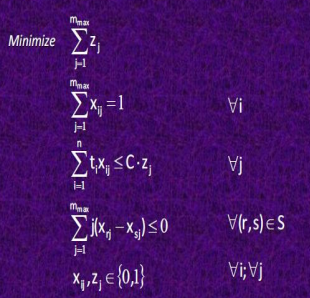  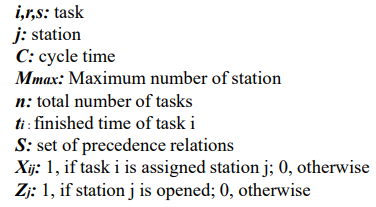

**THE MODEL**

In [2]:
mdl2 = gp.Model('Assembly Line Balancing')

Restricted license - for non-production use only - expires 2025-11-24


In [3]:
#Define the Parameters
num_tasks = 5
num_stations = 3
C = 10

tasks = [i+1 for i in range(num_tasks)]
stations = [j+1 for j in range(num_stations) ]
pairs = [(i,j) for i in tasks for j in stations]

times = [3,6,4,5,1]

#precedence Relations
S = [(1,2),(1,3),(2,5),(3,4),(4,5)] 

In [4]:
tasks, t = gp.multidict({tasks[i]:times[i] for i in range(num_tasks)})
t

{1: 3, 2: 6, 3: 4, 4: 5, 5: 1}

*Variables*

In [5]:
x = mdl2.addVars(pairs, vtype=GRB.BINARY, name='X')
z = mdl2.addVars(stations, vtype=GRB.BINARY, name='station')

*Objective Function*

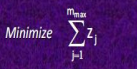

In [6]:
mdl2.setObjective(quicksum(z[j] for j in stations), GRB.MINIMIZE)

*Constraints*

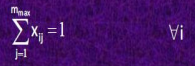

In [7]:
mdl2.addConstrs(quicksum(x[(i,j)] for j in stations) == 1 for i in tasks)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>}

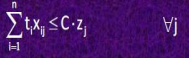

In [8]:
mdl2.addConstrs(quicksum(t[i]*x[i,j] for i in tasks) <= C*z[j] for j in stations)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

In [9]:
#sayac = [quicksum(x[i,j]*t[i] for i in tasks) for j in stations]


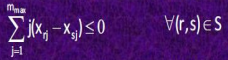

In [10]:
mdl2.addConstrs(quicksum(j*(x[r,j] - x[s,j]) for j in stations) <= 0 for r,s in S)

{(1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (3, 4): <gurobi.Constr *Awaiting Model Update*>,
 (4, 5): <gurobi.Constr *Awaiting Model Update*>}

In [11]:
mdl2.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i3-10100F CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 13 rows, 18 columns and 63 nonzeros
Model fingerprint: 0x1f11f5bb
Variable types: 0 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 5 rows and 6 columns
Presolve time: 0.01s
Presolved: 8 rows, 12 columns, 29 nonzeros
Variable types: 0 continuous, 12 integer (12 binary)

Root relaxation: objective 1.900000e+00, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0

In [12]:
for i in mdl2.getVars():
  if i.x > 0:
    print(i.VarName, i.x)

X[1,2] 1.0
X[2,2] 1.0
X[3,3] 1.0
X[4,3] 1.0
X[5,3] 1.0
station[2] 1.0
station[3] 1.0
